In [1]:
# BTC Price Analysis
# 
# Steps:
# 1. Get BTC prices from Yahoo Finance
# 2. Get the frequency of searches by the key word 'Bitcoin' from Google Trends
# 3. Run a linear regression to finde the correlation between the BTC price and the frequency of searches by that key word
# 4. Summerize the results of regression

In [27]:
import numpy as np
import pandas as pd

#python3 -m pip install pandas-datareader
import pandas_datareader.data as pdr

import matplotlib.pyplot as plt

#pip3 install statsmodels
import statsmodels.api as sm

from datetime import datetime

In [3]:
#Let's take end date to be today
end = datetime.today()

#Get cryptocurrency data from yahoo finance 
BTC = pdr.get_data_yahoo('BTC-USD',start = "2015-1-1",end = datetime.today(),interval='m')

In [4]:
#BTC price
BTC

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-01,320.434998,171.509995,320.434998,217.464005,1098811912,217.464005
2015-02-01,265.610992,212.014999,216.867004,254.263000,711518700,254.263000
2015-03-01,300.044006,236.514999,254.283005,244.223999,959098300,244.223999
2015-03-31,261.798004,214.873993,244.223007,236.145004,672338700,236.145004
2015-04-30,247.804001,228.572998,235.938995,230.190002,568122600,230.190002
...,...,...,...,...,...,...
2020-12-01,29244.876953,17619.533203,19633.769531,29001.720703,1212259707946,29001.720703
2021-01-01,41946.738281,28722.755859,28994.009766,33114.359375,2155904438233,33114.359375
2021-02-01,58330.570312,32384.228516,33114.578125,45137.769531,2267152936675,45137.769531


In [5]:
#Set the figure sizes
plt.rcParams['figure.figsize'] = (10,8)

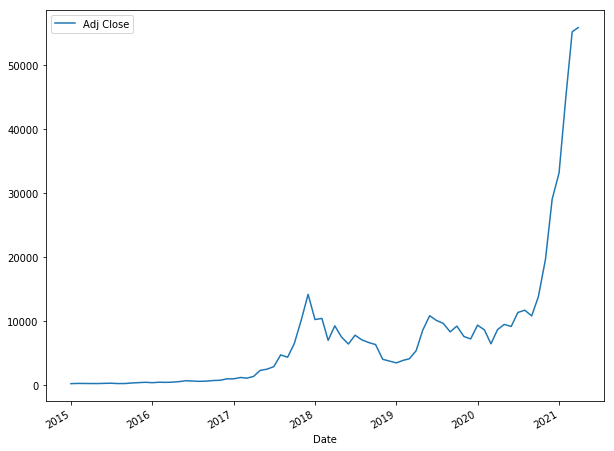

In [6]:
#Bitcoin price movements from 2015-1-1 till today
BTC['Adj Close'].plot(legend = True);

In [7]:
#10,20,and 50 days moving average with Bitcoin prices

ma_days = [10,20,50]

for ma in ma_days:
     column_name = "MA %s days"%(str(ma))        
     BTC[column_name] = BTC['Adj Close'].rolling(window=ma,center=False).mean()  

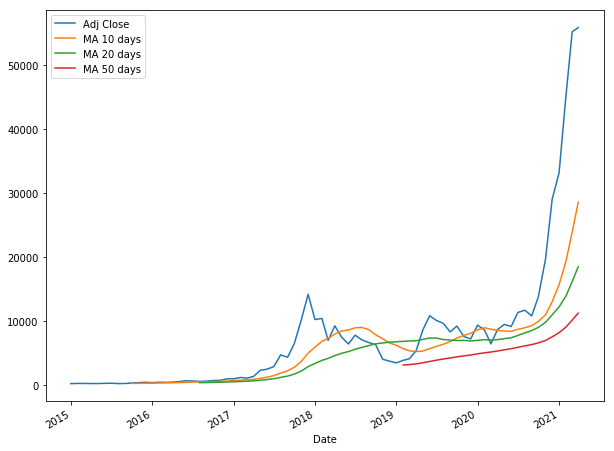

In [8]:
BTC[['Adj Close','MA 10 days','MA 20 days','MA 50 days']].plot(legend=True);

In [9]:
#Downloaded Bitcoin Google Seraches from Google Trends 

BTC_searches= pd.read_csv('./multiTimeline.csv',skiprows=1)

In [10]:
BTC_searches.columns = ['Date','Bitcoin']

In [11]:
BTC_searches

,Date,Bitcoin
0,2015-01,3
1,2015-02,3
2,2015-03,2
3,2015-04,2
4,2015-05,2
...,...,...
70,2020-11,17
71,2020-12,25
72,2021-01,48
73,2021-02,50


In [12]:
#Combine Two Dataframes

BTC_prices = BTC['Adj Close'].iloc[:-1]
BTC_prices

Date
2015-01-01      217.464005
2015-02-01      254.263000
2015-03-01      244.223999
2015-03-31      236.145004
2015-04-30      230.190002
                  ...     
2020-11-01    19625.835938
2020-12-01    29001.720703
2021-01-01    33114.359375
2021-02-01    45137.769531
2021-03-01    55137.312500
Name: Adj Close, Length: 75, dtype: float64

In [13]:
df = pd.concat([BTC_searches.reset_index(drop=True),BTC_prices.reset_index(drop=True)], axis=1)

In [14]:
df.head(5)

,Date,Bitcoin,Adj Close
0,2015-01,3,217.464005
1,2015-02,3,254.263000
2,2015-03,2,244.223999
3,2015-04,2,236.145004
4,2015-05,2,230.190002


In [15]:
df.tail(5)

,Date,Bitcoin,Adj Close
70,2020-11,17,19625.835938
71,2020-12,25,29001.720703
72,2021-01,48,33114.359375
73,2021-02,50,45137.769531
74,2021-03,36,55137.312500


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]


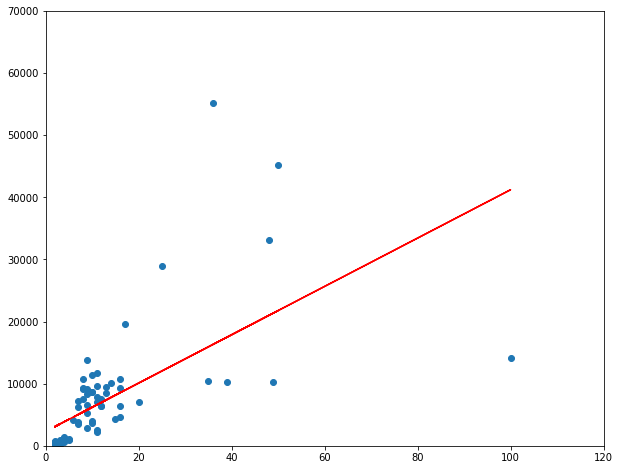

In [19]:
# Linear Regression Statistics with 1 variable

# Scaterplot where Price(Y) is a dependant on number of searches for 'Bitcoin' (X)
X = df['Bitcoin']
Y = df['Adj Close']
plt.scatter(X,Y)
plt.axis([0,120,0,70000])


#Draw the trend line
z = np.polyfit(X,Y,1)
p = np.poly1d(z)
plt.plot(X,p(X),"r")
plt.show()

In [22]:
#Regression
X1 = sm.add_constant(X)
reg = sm.OLS(Y, X1).fit()

In [23]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Adj Close   R-squared:                       0.381
Model:                            OLS   Adj. R-squared:                  0.372
Method:                 Least Squares   F-statistic:                     44.89
Date:                Sun, 28 Mar 2021   Prob (F-statistic):           3.74e-09
Time:                        22:52:10   Log-Likelihood:                -774.70
No. Observations:                  75   AIC:                             1553.
Df Residuals:                      73   BIC:                             1558.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2307.0079   1106.216      2.085      0.041     102.323    4511.693
Bitcoin      389.0915     58.076      6.700      0.000     273.346     504.837
==============================================================================
Omnibus:                       54.714   Durbin-Watson:                   0.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              450.565
Skew:                           1.889   Prob(JB):                     1.45e-98
Kurtosis:                      14.397   Cond. No.                         24.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
# Summery:
#p-values for the slope is smaller than 0.01. 
#That means that the number of Google searches for 'Bitcoin' significantly predict the Bitcoin prices.